In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D

In [23]:
crimes = pd.read_csv("https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e")
crimeByHood = crimes["INCIDENTNEIGHBORHOOD"]
numCrimes = crimeByHood.value_counts().rename_axis('Neighborhood').reset_index(name='Number of Crimes')
numCrimes.head()

,Neighborhood,Number of Crimes
0,South Side Flats,15144
1,Central Business District,13551
2,Carrick,9207
3,Bloomfield,7077
4,Shadyside,6771


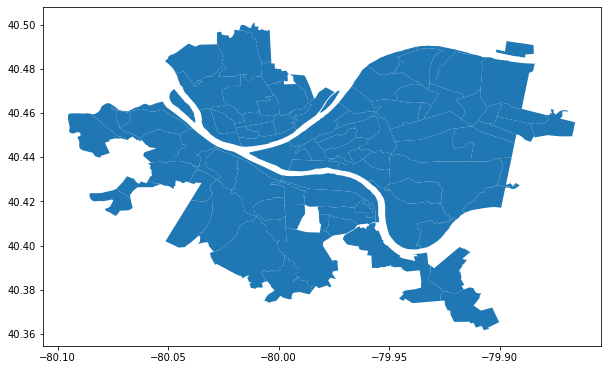

In [24]:
neighborhoods = gpd.read_file("Neighborhoods_.shp")
neighborhoods.plot(figsize = (10,10))
neighborhoods = neighborhoods[["hood", "geometry"]]

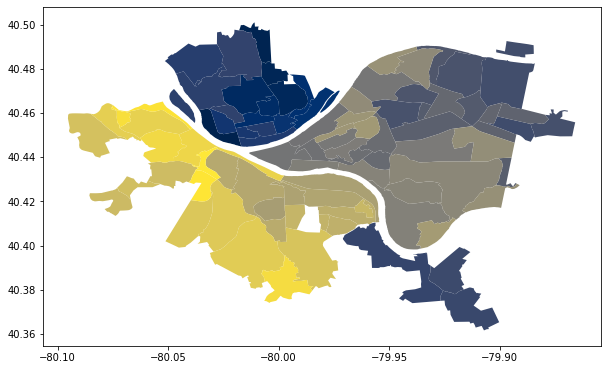

In [25]:
numCrimes.replace("Mt. Oliver Neighborhood", "Mt. Oliver", inplace = True)
for index, row in neighborhoods["hood"].iteritems():
    if row in numCrimes['Neighborhood'].tolist():
        pass
    else:
        print(row + " not in crime data set")
    #crime.replace("Mt. Oliver Neighborhood", "Mt. Oliver", inplace = True)
neighborhoods.plot(figsize = (10,10), cmap = "cividis", legend = True)

In [26]:
#creating the percentages of the crimes compared to the neighborhood with the most crime
crimeMax = 15144
numCrimes["Percentage of Crimes"] = ""
percent = 0.0
for row in numCrimes.iterrows():
    percent = float(row[1][1])/crimeMax
    numCrimes['Percentage of Crimes'][row[0]] = percent
numCrimes

<ipython-input-26-5b077f8540bb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numCrimes['Percentage of Crimes'][row[0]] = percent


,Neighborhood,Number of Crimes,Percentage of Crimes
0,South Side Flats,15144,1
1,Central Business District,13551,0.89481
2,Carrick,9207,0.607964
3,Bloomfield,7077,0.467314
4,Shadyside,6771,0.447108
...,...,...,...
93,Chartiers City,246,0.0162441
94,Outside State,245,0.016178
95,Outside County,177,0.0116878
96,Mt. Oliver,117,0.00772583


In [27]:
# merging the two lists
neighborhoods = neighborhoods.rename(columns={"hood": "Neighborhood"})
CrimeHoodMerged = neighborhoods.merge(numCrimes)
CrimeHoodMerged

,Neighborhood,geometry,Number of Crimes,Percentage of Crimes
0,Chateau,"POLYGON ((-80.02999 40.45909, -80.02989 40.458...",1989,0.131339
1,Summer Hill,"POLYGON ((-80.01078 40.49975, -80.01073 40.499...",421,0.0277998
2,Northview Heights,"POLYGON ((-80.00327 40.48271, -80.00325 40.482...",2110,0.139329
3,Spring Hill-City View,"POLYGON ((-79.99761 40.47460, -79.99761 40.474...",1937,0.127905
4,Perry South,"POLYGON ((-80.01422 40.47745, -80.01435 40.477...",3182,0.210116
...,...,...,...,...
85,Overbrook,"POLYGON ((-79.99633 40.39458, -79.99630 40.394...",1745,0.115227
86,Chartiers City,"POLYGON ((-80.06919 40.46046, -80.06912 40.460...",246,0.0162441
87,Esplen,"POLYGON ((-80.05154 40.46364, -80.05140 40.463...",509,0.0336107
88,Ridgemont,"POLYGON ((-80.03431 40.43366, -80.03424 40.433...",260,0.0171685


AttributeError: 'tuple' object has no attribute 'legend'

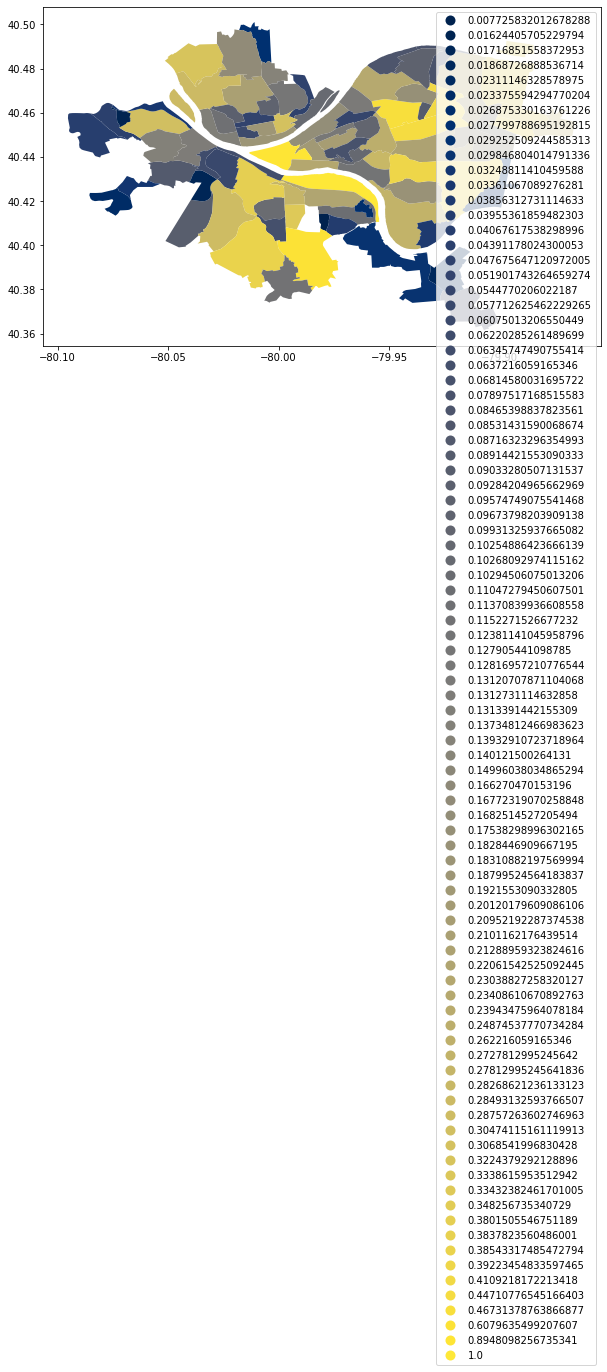

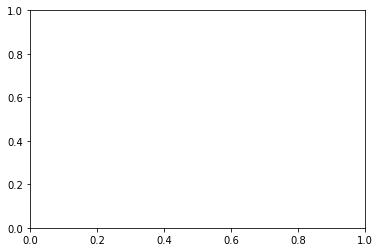

In [28]:
#plotting the map
CrimeHoodMerged.plot(column = 'Percentage of Crimes', figsize = (10,10), cmap = "cividis", legend = True)
ax = plt.subplots()
ax.legend()
#CrimeHoodMerged.legend(custom_lines)